In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['plot_summaries.txt', 'movie.metadata.tsv']


In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [3]:
!ls ../input

movie.metadata.tsv  plot_summaries.txt


In [4]:
#Importing data
filename = "../input/movie.metadata.tsv"
meta = pd.read_csv(filename, sep = '\t', header = None)

In [5]:
#Looking at few of data rows
meta.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""Horror"", ""/m/03k9fj"": ""Adventure"", ""/m/0fdjb"": ""Supernatural"", ""/m/02kdv5l"": ""Action"", ""/m/09zvmj"": ""Space western""}"
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey Mystery,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0"": ""Drama"", ""/m/0hj3n01"": ""Crime Drama""}"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama""}"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic thriller"", ""/m/09blyk"": ""Psychological thriller""}"
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [6]:
#Renaming the columns
meta.columns = ["movie_id",1,"movie_name",3,4,5,6,7,"genre"]

In [7]:
#loading the movie plot dataset 

In [8]:
plots = []

with open("../input/plot_summaries.txt", 'r') as f:
       reader = csv.reader(f, dialect='excel-tab') 
       for row in tqdm(reader):
        plots.append(row)

42303it [00:01, 40239.35it/s]


In [9]:
#Getting movie ids and plot summaries

In [10]:
movie_id = []
plot = []


for i in tqdm(plots):
  movie_id.append(i[0])
  plot.append(i[1])

# create dataframe
movies = pd.DataFrame({'movie_id': movie_id, 'plot': plot})

100%|██████████| 42303/42303 [00:00<00:00, 1271064.04it/s]


In [11]:
#Looking at some rows of movies 
movies.head()

,movie_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all."
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole..."
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e..."
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo..."
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r..."


In [12]:
#Change datatype of 'movie_id' to string
meta['movie_id'] = meta['movie_id'].astype(str)

#Merge meta with movies along columns
movies = pd.merge(movies, meta[['movie_id', 'movie_name', 'genre']], on = 'movie_id')

movies.head()

,movie_id,plot,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World cinema""}"
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}"
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama"", ""/m/01chg"": ""Bollywood""}"
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""Comedy""}"
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...",A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama"", ""/m/01f9r0"": ""Docudrama"", ""/m/03q4nz"": ""World cinema"", ""/m/05bh16v"": ""Courtroom Drama""}"


In [13]:
#Creating an empty list of genres
genres = [] 

#Extracting genres from movies
for i in movies['genre']: 
  genres.append(list(json.loads(i).values())) 

#Add to 'movies' dataframe in genre_new column
movies['genre_new'] = genres

In [14]:
movies['genre_new']

0                                                                                                                    [Drama, World cinema]
1                                                                                       [Action/Adventure, Science Fiction, Action, Drama]
2                                                                                                      [Musical, Action, Drama, Bollywood]
3                                                                                                               [Screwball comedy, Comedy]
4                                                                         [Crime Fiction, Drama, Docudrama, World cinema, Courtroom Drama]
5                                                                                              [Thriller, Action/Adventure, Action, Drama]
6                                                                                                                [Thriller, Drama, Horror]
7                          

In [15]:
#Remove samples with empty(no) genre tags
movies_new = movies[~(movies['genre_new'].str.len() == 0)]

In [16]:
movies_new.shape, movies.shape

((41793, 5), (42204, 5))

In [17]:
movies.head()

,movie_id,plot,movie_name,genre,genre_new
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World cinema""}","[Drama, World cinema]"
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}","[Action/Adventure, Science Fiction, Action, Drama]"
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama"", ""/m/01chg"": ""Bollywood""}","[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""Comedy""}","[Screwball comedy, Comedy]"
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...",A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama"", ""/m/01f9r0"": ""Docudrama"", ""/m/03q4nz"": ""World cinema"", ""/m/05bh16v"": ""Courtroom Drama""}","[Crime Fiction, Drama, Docudrama, World cinema, Courtroom Drama]"


In [18]:
#Getting all genre tags in a list
all_genres = sum(genres,[])
len(set(all_genres))

363

In [19]:
all_genres = nltk.FreqDist(all_genres) 

#Create a dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
'Count': list(all_genres.values())})

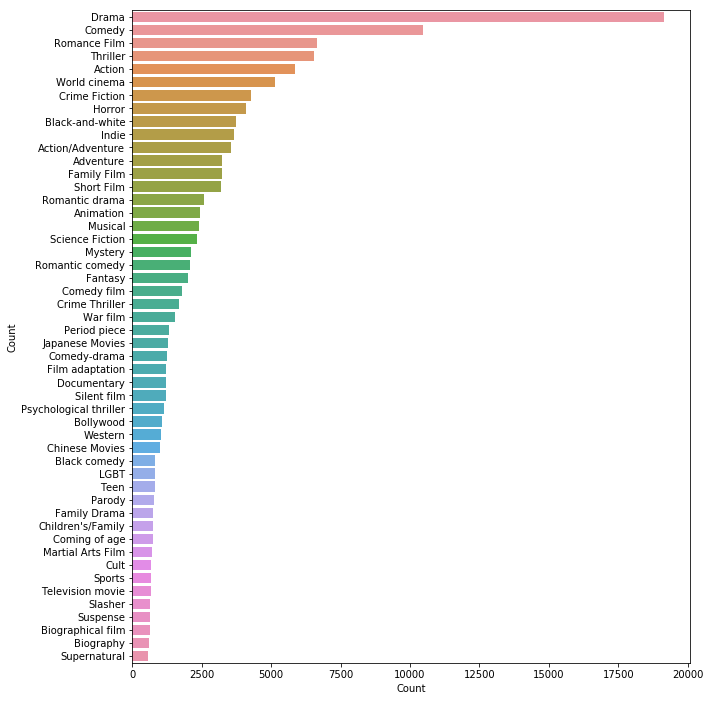

In [20]:
#Plot of different Genre and their respective Count
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(10,12)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [21]:
#Function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    return text

In [22]:
movies_new['clean_plot'] = movies_new['plot'].apply(lambda x: clean_text(x))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


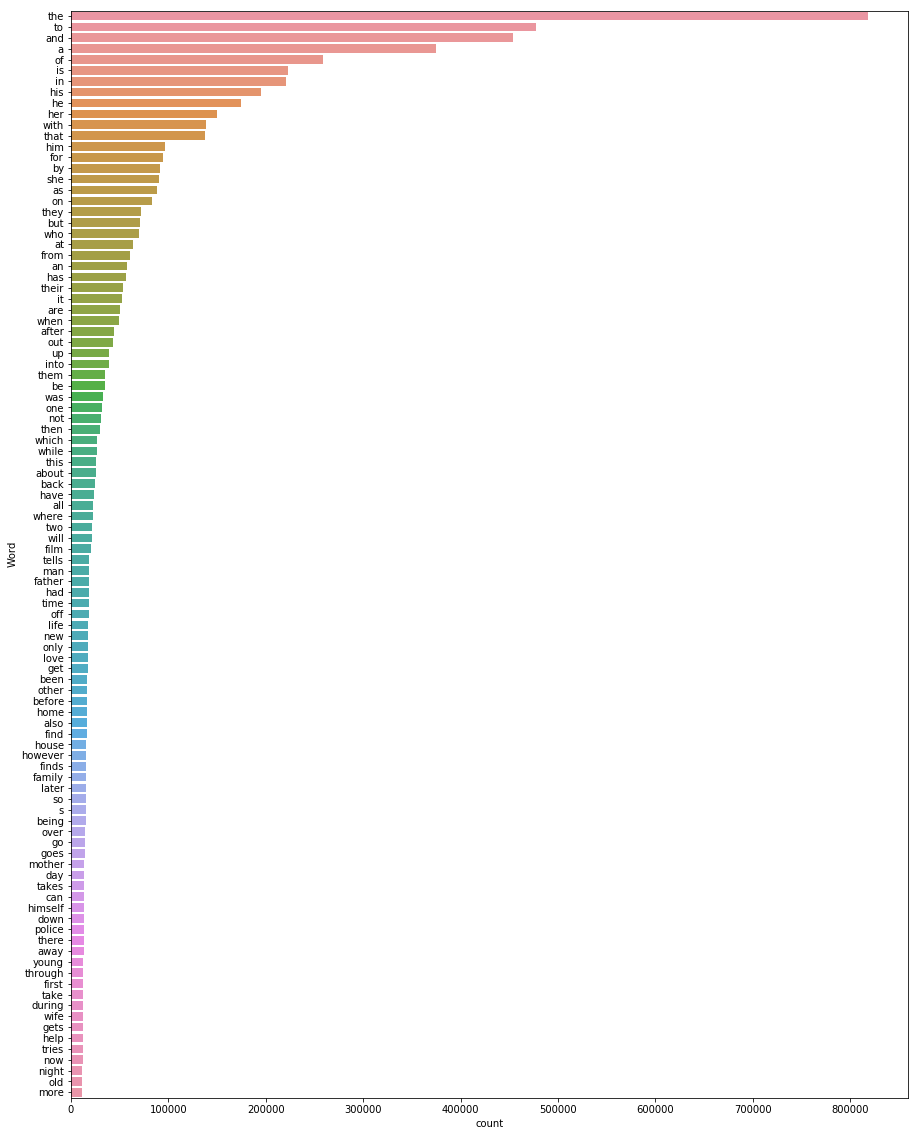

In [23]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  #Visualize words and their frequencies by plotting
  plt.figure(figsize=(15,20)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(movies_new['clean_plot'], 100)

In [24]:
#importing nltk for text data processing
import nltk

In [25]:
#printing few of stopwords 
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [26]:
#Importing stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#Function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

movies_new['clean_plot'] = movies_new['clean_plot'].apply(lambda x: remove_stopwords(x))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


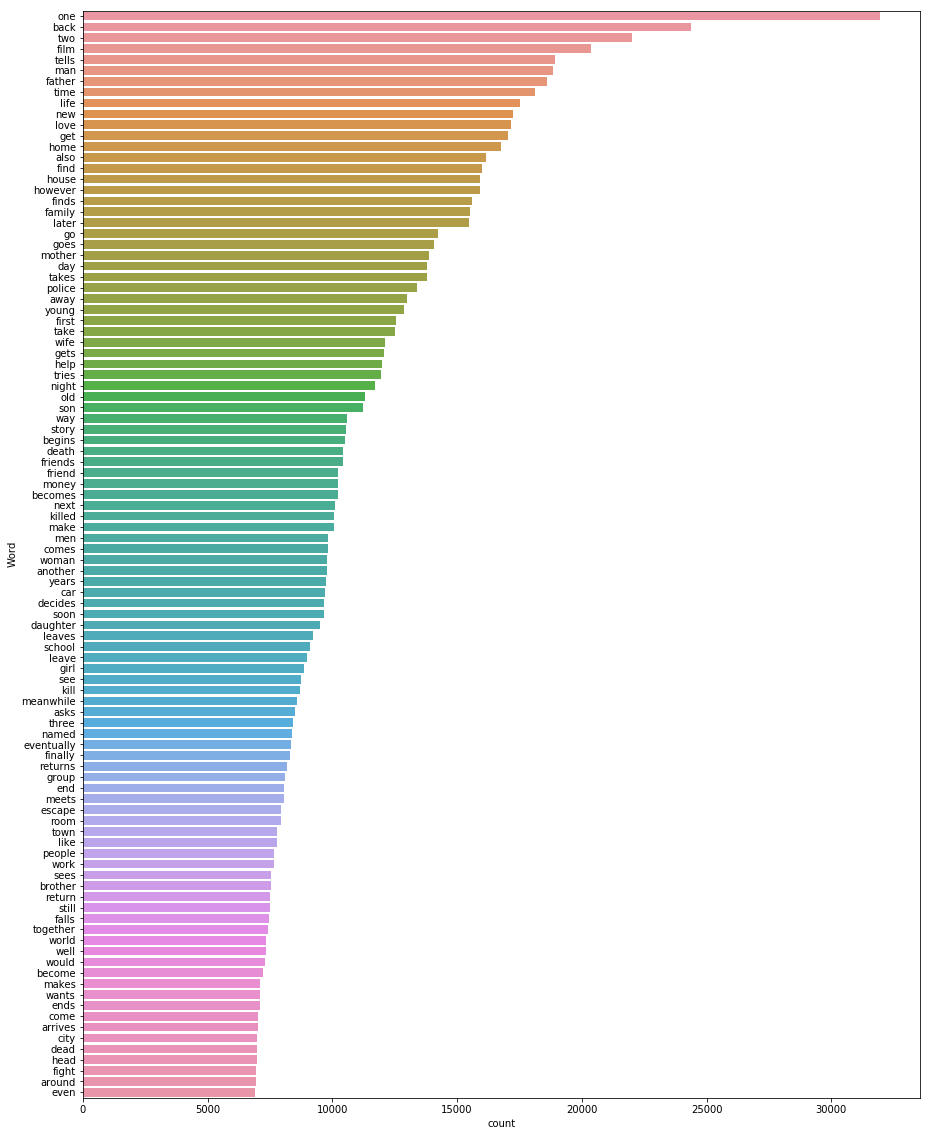

In [27]:
#After removing stopwords from text data plotting the top 100 most frequent word in clean_plot
freq_words(movies_new['clean_plot'], 100)

In [28]:
#one hot encode the target variable, i.e., genre_new by using sklearn’s MultiLabelBinarizer( ).
#Since there are 363 unique genre tags, there are going to be 363 new target variables.

from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies_new['genre_new'])

y = multilabel_binarizer.transform(movies_new['genre_new'])

In [29]:
#Split the dataset into training and validation set respectively
xtrain, xval, ytrain, yval = train_test_split(movies_new['clean_plot'], y, test_size=0.2, random_state=9)

In [30]:
#importing gensim to make word2vec embedding
import gensim

In [31]:
#Building word2vec embedding
model = gensim.models.Word2Vec(list(xtrain.apply(lambda x: x.split(' ')))+list(xval.apply(lambda x: x.split(' '))), min_count=1,size=100,workers=4)

In [32]:
#Checking for a word
model['mystery']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([-1.1466603e+00, -2.2886662e+00, -1.1731645e+00, -5.5271763e-01,
       -2.5294747e+00, -1.2969421e-01, -2.7685779e-01,  4.6067488e-01,
        6.1883104e-01, -1.8697317e+00,  2.5108066e+00,  1.6583208e+00,
       -6.1760890e-01,  1.8820764e-01, -3.5633358e-01, -3.7786707e-01,
        1.8964804e+00, -9.2824638e-01,  8.0631191e-01, -1.1500529e-01,
        5.8488703e-01, -4.8579127e-01,  6.2356248e-02, -1.4140899e+00,
        3.4099454e-01,  3.8177472e-01, -5.0646317e-01, -6.5068316e-01,
       -5.3628586e-02, -6.8890363e-01,  9.5731813e-01, -2.3639181e+00,
        2.9063529e-01,  1.7880466e+00,  5.7746696e-01,  6.8874764e-01,
        4.3006068e-01,  6.1961395e-01,  6.4040715e-01, -7.8219265e-01,
        7.5039256e-01,  1.2850242e+00, -1.3309933e+00,  1.1175660e+00,
       -6.4277816e-01, -6.1071414e-01,  1.5059819e+00, -5.4911632e-02,
        1.5398166e+00,  5.0860107e-01, -1.8179964e+00, -1.8476497e+00,
        4.0308881e-01, -4.6549654e-01,  1.4105161e+00,  3.7679607e-01,
      

Checking embedding matrix for the word "mystery"

In [33]:
max_features = 10000
maxlen = 500
embed_size = 100

In [34]:
#importing required packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from keras.models import Model
from keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D
from keras.preprocessing import text, sequence
from keras.callbacks import Callback

import warnings
warnings.filterwarnings('ignore')

import os
os.environ['OMP_NUM_THREADS'] = '4'


Using TensorFlow backend.


In [35]:
#Tokanize the text data
tokanizer=text.Tokenizer(10000)

In [36]:
tokanizer.fit_on_texts(list(xtrain)+list(xval))

In [37]:
#Converting xtrain and xval from text to sequences

In [38]:
x_train=tokanizer.texts_to_sequences(xtrain)

In [39]:
x_val=tokanizer.texts_to_sequences(xval)

In [40]:
#Pad the sequences which are less than maxlen and trunate the sequences which are larger than maxlen
x_train = sequence.pad_sequences(x_train, maxlen=maxlen, padding='post', truncating='post')
x_test = sequence.pad_sequences(x_val, maxlen=maxlen, padding='post', truncating='post')


In [41]:
#embedding matrix of size 10000 and 100 features
e=np.zeros((10000, 100))
for i in range(1,10000):
  e[i]=model[tokanizer.index_word[i]]
e[0]=0

In [42]:
e

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.34988439, -1.23939455,  0.53778929, ...,  1.13945091,
        -2.09577227, -0.07089946],
       [-1.52708101, -0.32225785, -0.36309519, ..., -1.07920718,
        -0.36125663,  0.66491205],
       ...,
       [-0.00925308, -0.22369863, -0.30331659, ..., -0.40445319,
         0.32809344,  0.49188578],
       [ 0.18054427, -0.06991178, -0.40943319, ...,  0.0580181 ,
         0.20909014,  0.41208798],
       [-0.07379664,  0.05724409,  0.03758325, ...,  0.01312368,
        -0.15683982,  0.45300949]])

In [43]:
########Conv2D-Model##############

In [44]:
filter_sizes = [1,2,3,5]
num_filters = 32
embedding_matrix=e

In [45]:
#Building 4 layer conv2D and 4 Maxpool layer with elu (Exponential Linear Unit) as activation function
def get_model():    
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
    x = SpatialDropout1D(0.4)(x)
    x = Reshape((maxlen, embed_size, 1))(x)
    
    conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_3 = Conv2D(num_filters, kernel_size=(filter_sizes[3], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    maxpool_0 = MaxPool2D(pool_size=(maxlen - filter_sizes[0] + 1, 1))(conv_0)
    maxpool_1 = MaxPool2D(pool_size=(maxlen - filter_sizes[1] + 1, 1))(conv_1)
    maxpool_2 = MaxPool2D(pool_size=(maxlen - filter_sizes[2] + 1, 1))(conv_2)
    maxpool_3 = MaxPool2D(pool_size=(maxlen - filter_sizes[3] + 1, 1))(conv_3)
        
    z = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2, maxpool_3])   
    z = Flatten()(z)
    z = Dropout(0.3)(z)
        
    outp = Dense(363, activation="sigmoid")(z)
    
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model
    

In [46]:
model = get_model()

In [47]:
#Training the model
batch_size = 32
epochs = 10

hist = model.fit(x_train, ytrain, batch_size=batch_size, epochs=epochs, 
                  verbose=1)

Epoch 1/10
33434/33434 [==============================] - 13s 400us/step - loss: 0.0498 - acc: 0.9868
Epoch 2/10
33434/33434 [==============================] - 11s 340us/step - loss: 0.0363 - acc: 0.9903
Epoch 3/10
33434/33434 [==============================] - 11s 340us/step - loss: 0.0344 - acc: 0.9904
Epoch 4/10
33434/33434 [==============================] - 11s 339us/step - loss: 0.0333 - acc: 0.9905
Epoch 5/10
33434/33434 [==============================] - 11s 340us/step - loss: 0.0325 - acc: 0.9906
Epoch 6/10
33434/33434 [==============================] - 11s 340us/step - loss: 0.0318 - acc: 0.9906
Epoch 7/10
33434/33434 [==============================] - 11s 341us/step - loss: 0.0316 - acc: 0.9906
Epoch 8/10
33434/33434 [==============================] - 11s 340us/step - loss: 0.0313 - acc: 0.9907
Epoch 9/10
33434/33434 [==============================] - 11s 339us/step - loss: 0.0310 - acc: 0.9907
Epoch 10/10
33434/33434 [==============================] - 11s 341us/step - loss: 

Performing hyperparameter tuning by using batch size of 32,64,16 and 8 respectively.

In [48]:
#Prediction on x_test data
y_pred = model.predict(x_test, batch_size=32)

Finetuned the model by varying the threshold values and found out that for a threshold values of 0.2 the model gives best f1-score. Thus setting threshold values to be 0.2

In [49]:
threshold=0.2
y_pred[y_pred>=threshold]=1
y_pred[y_pred<threshold]=0

In [50]:
#use the inverse_transform( ) function 
#along with the MultiLabelBinarizer( ) object 
#to convert the predicted arrays into movie genre tags:
multilabel_binarizer.inverse_transform(y_pred)[15]

('Comedy', 'Drama', 'Romance Film')

In [51]:
multilabel_binarizer.inverse_transform(yval)[15]

('Comedy',)

In [52]:
# Performance metric
from sklearn.metrics import f1_score

In [53]:
# evaluate performance for actual prediction
f1_score(yval, y_pred, average="micro")

0.4338878191976263

In [54]:
#Training the model
batch_size = 64
epochs = 10

hist = model.fit(x_train, ytrain, batch_size=batch_size, epochs=epochs, 
                  verbose=1)

Epoch 1/10
33434/33434 [==============================] - 8s 227us/step - loss: 0.0303 - acc: 0.9908
Epoch 2/10
33434/33434 [==============================] - 8s 226us/step - loss: 0.0302 - acc: 0.9908
Epoch 3/10
33434/33434 [==============================] - 8s 225us/step - loss: 0.0300 - acc: 0.9908
Epoch 4/10
33434/33434 [==============================] - 7s 224us/step - loss: 0.0299 - acc: 0.9909
Epoch 5/10
33434/33434 [==============================] - 8s 224us/step - loss: 0.0298 - acc: 0.9909
Epoch 6/10
33434/33434 [==============================] - 8s 225us/step - loss: 0.0297 - acc: 0.9909
Epoch 7/10
33434/33434 [==============================] - 8s 226us/step - loss: 0.0296 - acc: 0.9909
Epoch 8/10
33434/33434 [==============================] - 8s 225us/step - loss: 0.0295 - acc: 0.9909
Epoch 9/10
33434/33434 [==============================] - 8s 225us/step - loss: 0.0294 - acc: 0.9909
Epoch 10/10
33434/33434 [==============================] - 8s 224us/step - loss: 0.0293 - a

In [55]:
#Predict on test data
y_pred = model.predict(x_test)

In [56]:
#classifying based on threshold vaues
threshold=0.2
y_pred[y_pred>=threshold]=1
y_pred[y_pred<threshold]=0

In [57]:
#Evaluate performance for actual prediction
f1_score(yval, y_pred, average="micro")

0.4413910858394678

In [58]:
#Training the model
batch_size = 16
epochs = 10

hist = model.fit(x_train, ytrain, batch_size=batch_size, epochs=epochs, 
                  verbose=1)

Epoch 1/10
33434/33434 [==============================] - 16s 483us/step - loss: 0.0303 - acc: 0.9908
Epoch 2/10
33434/33434 [==============================] - 16s 482us/step - loss: 0.0299 - acc: 0.9909
Epoch 3/10
33434/33434 [==============================] - 17s 497us/step - loss: 0.0297 - acc: 0.9909
Epoch 4/10
33434/33434 [==============================] - 16s 479us/step - loss: 0.0297 - acc: 0.9909
Epoch 5/10
33434/33434 [==============================] - 16s 484us/step - loss: 0.0295 - acc: 0.9909
Epoch 6/10
33434/33434 [==============================] - 16s 480us/step - loss: 0.0293 - acc: 0.9910
Epoch 7/10
33434/33434 [==============================] - 16s 478us/step - loss: 0.0292 - acc: 0.9910
Epoch 8/10
33434/33434 [==============================] - 16s 480us/step - loss: 0.0291 - acc: 0.9910
Epoch 9/10
33434/33434 [==============================] - 16s 479us/step - loss: 0.0289 - acc: 0.9910
Epoch 10/10
33434/33434 [==============================] - 16s 477us/step - loss: 

In [59]:
#Prediction on test data
y_pred = model.predict(x_test)

In [60]:
#Classifying based on threshold set
threshold=0.2
y_pred[y_pred>=threshold]=1
y_pred[y_pred<threshold]=0

In [61]:
# evaluate performance for actual prediction
f1_score(yval, y_pred, average="micro")

0.4362792810330284

In [62]:
#Thraining the model
batch_size = 8
epochs = 10

hist = model.fit(x_train, ytrain, batch_size=batch_size, epochs=epochs, 
                  verbose=1)

Epoch 1/10
33434/33434 [==============================] - 26s 767us/step - loss: 0.0294 - acc: 0.9910
Epoch 2/10
33434/33434 [==============================] - 26s 769us/step - loss: 0.0293 - acc: 0.9910
Epoch 3/10
33434/33434 [==============================] - 26s 765us/step - loss: 0.0291 - acc: 0.9910
Epoch 4/10
33434/33434 [==============================] - 26s 766us/step - loss: 0.0290 - acc: 0.9910
Epoch 5/10
33434/33434 [==============================] - 26s 769us/step - loss: 0.0289 - acc: 0.9910
Epoch 6/10
33434/33434 [==============================] - 26s 765us/step - loss: 0.0287 - acc: 0.9911
Epoch 7/10
33434/33434 [==============================] - 26s 764us/step - loss: 0.0286 - acc: 0.9911
Epoch 8/10
33434/33434 [==============================] - 26s 779us/step - loss: 0.0285 - acc: 0.9912
Epoch 9/10
33434/33434 [==============================] - 28s 835us/step - loss: 0.0283 - acc: 0.9912
Epoch 10/10
33434/33434 [==============================] - 29s 857us/step - loss: 

In [63]:
#Prediction on test data
y_pred = model.predict(x_test)

In [64]:
#Classifying based on threshold set
threshold=0.2
y_pred[y_pred>=threshold]=1
y_pred[y_pred<threshold]=0

In [65]:
# evaluate performance for actual prediction
f1_score(yval, y_pred, average="micro")

0.42703064448352607

In [66]:
#Now increasing the number of filters to 64 from 32 we again run the model
filter_sizes = [1,2,3,5]
num_filters = 64
embedding_matrix=e

In [67]:
def get_model():    
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
    x = SpatialDropout1D(0.4)(x)
    x = Reshape((maxlen, embed_size, 1))(x)
    
    conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_3 = Conv2D(num_filters, kernel_size=(filter_sizes[3], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    maxpool_0 = MaxPool2D(pool_size=(maxlen - filter_sizes[0] + 1, 1))(conv_0)
    maxpool_1 = MaxPool2D(pool_size=(maxlen - filter_sizes[1] + 1, 1))(conv_1)
    maxpool_2 = MaxPool2D(pool_size=(maxlen - filter_sizes[2] + 1, 1))(conv_2)
    maxpool_3 = MaxPool2D(pool_size=(maxlen - filter_sizes[3] + 1, 1))(conv_3)
        
    z = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2, maxpool_3])   
    z = Flatten()(z)
    z = Dropout(0.3)(z)
        
    outp = Dense(363, activation="sigmoid")(z)
    
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [68]:
model = get_model()

In [69]:
#Training the model
batch_size = 32
epochs = 10

hist = model.fit(x_train, ytrain, batch_size=batch_size, epochs=epochs, 
                  verbose=1)

Epoch 1/10
33434/33434 [==============================] - 14s 432us/step - loss: 0.0470 - acc: 0.9879
Epoch 2/10
33434/33434 [==============================] - 14s 412us/step - loss: 0.0354 - acc: 0.9904
Epoch 3/10
33434/33434 [==============================] - 14s 415us/step - loss: 0.0335 - acc: 0.9905
Epoch 4/10
33434/33434 [==============================] - 14s 407us/step - loss: 0.0323 - acc: 0.9906
Epoch 5/10
33434/33434 [==============================] - 14s 411us/step - loss: 0.0314 - acc: 0.9906
Epoch 6/10
33434/33434 [==============================] - 14s 409us/step - loss: 0.0309 - acc: 0.9907
Epoch 7/10
33434/33434 [==============================] - 14s 415us/step - loss: 0.0305 - acc: 0.9908
Epoch 8/10
33434/33434 [==============================] - 14s 416us/step - loss: 0.0302 - acc: 0.9908
Epoch 9/10
33434/33434 [==============================] - 14s 412us/step - loss: 0.0299 - acc: 0.9908
Epoch 10/10
33434/33434 [==============================] - 14s 406us/step - loss: 

In [70]:
#Predicting on x_test from the above model trained
y_pred = model.predict(x_test)

In [71]:
#Classiying based on threshold values
threshold=0.2
y_pred[y_pred>=threshold]=1
y_pred[y_pred<threshold]=0

In [72]:
#Evaluate performance for actual prediction
f1_score(yval, y_pred, average="micro")

0.43836092643288577

In [73]:
#Building the model by changing the dropout value from 0.3 to 0.2 
def get_model():    
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
    x = SpatialDropout1D(0.4)(x)
    x = Reshape((maxlen, embed_size, 1))(x)
    
    conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_3 = Conv2D(num_filters, kernel_size=(filter_sizes[3], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    maxpool_0 = MaxPool2D(pool_size=(maxlen - filter_sizes[0] + 1, 1))(conv_0)
    maxpool_1 = MaxPool2D(pool_size=(maxlen - filter_sizes[1] + 1, 1))(conv_1)
    maxpool_2 = MaxPool2D(pool_size=(maxlen - filter_sizes[2] + 1, 1))(conv_2)
    maxpool_3 = MaxPool2D(pool_size=(maxlen - filter_sizes[3] + 1, 1))(conv_3)
        
    z = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2, maxpool_3])   
    z = Flatten()(z)
    z = Dropout(0.2)(z)
        
    outp = Dense(363, activation="sigmoid")(z)
    
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [74]:
model = get_model()

In [75]:
#Training the model
batch_size = 32
epochs = 10

hist = model.fit(x_train, ytrain, batch_size=batch_size, epochs=epochs, 
                  verbose=1)

Epoch 1/10
33434/33434 [==============================] - 14s 421us/step - loss: 0.0459 - acc: 0.9880
Epoch 2/10
33434/33434 [==============================] - 13s 392us/step - loss: 0.0348 - acc: 0.9904
Epoch 3/10
33434/33434 [==============================] - 13s 395us/step - loss: 0.0329 - acc: 0.9905
Epoch 4/10
33434/33434 [==============================] - 13s 397us/step - loss: 0.0317 - acc: 0.9906
Epoch 5/10
33434/33434 [==============================] - 13s 394us/step - loss: 0.0308 - acc: 0.9907
Epoch 6/10
33434/33434 [==============================] - 13s 396us/step - loss: 0.0303 - acc: 0.9908
Epoch 7/10
33434/33434 [==============================] - 14s 406us/step - loss: 0.0298 - acc: 0.9909
Epoch 8/10
33434/33434 [==============================] - 13s 397us/step - loss: 0.0294 - acc: 0.9909
Epoch 9/10
33434/33434 [==============================] - 13s 395us/step - loss: 0.0291 - acc: 0.9910
Epoch 10/10
33434/33434 [==============================] - 13s 400us/step - loss: 

In [76]:
#Prediction on test data
y_pred = model.predict(x_test)

In [77]:
#Classifying based on threshold set
y_pred[y_pred>=0.20]=1
y_pred[y_pred<0.20]=0

In [78]:
# evaluate performance for actual prediction
f1_score(yval, y_pred, average="micro")

0.43825436075653273

In [79]:
#Building the model by changing the dropout value from 0.2 to 0.1 
def get_model():    
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
    x = SpatialDropout1D(0.4)(x)
    x = Reshape((maxlen, embed_size, 1))(x)
    
    conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_3 = Conv2D(num_filters, kernel_size=(filter_sizes[3], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    maxpool_0 = MaxPool2D(pool_size=(maxlen - filter_sizes[0] + 1, 1))(conv_0)
    maxpool_1 = MaxPool2D(pool_size=(maxlen - filter_sizes[1] + 1, 1))(conv_1)
    maxpool_2 = MaxPool2D(pool_size=(maxlen - filter_sizes[2] + 1, 1))(conv_2)
    maxpool_3 = MaxPool2D(pool_size=(maxlen - filter_sizes[3] + 1, 1))(conv_3)
        
    z = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2, maxpool_3])   
    z = Flatten()(z)
    z = Dropout(0.1)(z)
        
    outp = Dense(363, activation="sigmoid")(z)
    
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [80]:
model = get_model()

In [81]:
#Training the model
batch_size = 32
epochs = 10

hist = model.fit(x_train, ytrain, batch_size=batch_size, epochs=epochs, 
                  verbose=1)

Epoch 1/10
33434/33434 [==============================] - 14s 432us/step - loss: 0.0438 - acc: 0.9884
Epoch 2/10
33434/33434 [==============================] - 13s 400us/step - loss: 0.0342 - acc: 0.9904
Epoch 3/10
33434/33434 [==============================] - 13s 396us/step - loss: 0.0322 - acc: 0.9906
Epoch 4/10
33434/33434 [==============================] - 13s 403us/step - loss: 0.0310 - acc: 0.9908
Epoch 5/10
33434/33434 [==============================] - 13s 403us/step - loss: 0.0302 - acc: 0.9908
Epoch 6/10
33434/33434 [==============================] - 13s 403us/step - loss: 0.0296 - acc: 0.9909
Epoch 7/10
33434/33434 [==============================] - 13s 401us/step - loss: 0.0291 - acc: 0.9910
Epoch 8/10
33434/33434 [==============================] - 13s 402us/step - loss: 0.0287 - acc: 0.9910
Epoch 9/10
33434/33434 [==============================] - 14s 405us/step - loss: 0.0284 - acc: 0.9911
Epoch 10/10
33434/33434 [==============================] - 14s 406us/step - loss: 

In [82]:
#prediction on test data
y_pred = model.predict(x_test)

In [83]:
#classifying based on threshold value set
y_pred[y_pred>=0.20]=1
y_pred[y_pred<0.20]=0

In [84]:
# evaluate performance for actual prediction
f1_score(yval, y_pred, average="micro")

0.4394503928566759

In [85]:
#Building the model by changing the SpatialDropout value from 0.4 to 0.3 and fixing the dropout value to be 0.2 based on above result 
def get_model():    
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
    x = SpatialDropout1D(0.3)(x)
    x = Reshape((maxlen, embed_size, 1))(x)
    
    conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_3 = Conv2D(num_filters, kernel_size=(filter_sizes[3], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    maxpool_0 = MaxPool2D(pool_size=(maxlen - filter_sizes[0] + 1, 1))(conv_0)
    maxpool_1 = MaxPool2D(pool_size=(maxlen - filter_sizes[1] + 1, 1))(conv_1)
    maxpool_2 = MaxPool2D(pool_size=(maxlen - filter_sizes[2] + 1, 1))(conv_2)
    maxpool_3 = MaxPool2D(pool_size=(maxlen - filter_sizes[3] + 1, 1))(conv_3)
        
    z = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2, maxpool_3])   
    z = Flatten()(z)
    z = Dropout(0.2)(z)
        
    outp = Dense(363, activation="sigmoid")(z)
    
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [86]:
model = get_model()

In [87]:
#Training the model
batch_size = 32
epochs = 10

hist = model.fit(x_train, ytrain, batch_size=batch_size, epochs=epochs, 
                  verbose=1)

Epoch 1/10
33434/33434 [==============================] - 15s 441us/step - loss: 0.0448 - acc: 0.9882
Epoch 2/10
33434/33434 [==============================] - 13s 390us/step - loss: 0.0341 - acc: 0.9905
Epoch 3/10
33434/33434 [==============================] - 13s 389us/step - loss: 0.0321 - acc: 0.9906
Epoch 4/10
33434/33434 [==============================] - 13s 398us/step - loss: 0.0308 - acc: 0.9908
Epoch 5/10
33434/33434 [==============================] - 14s 418us/step - loss: 0.0300 - acc: 0.9909
Epoch 6/10
33434/33434 [==============================] - 14s 422us/step - loss: 0.0294 - acc: 0.9909
Epoch 7/10
33434/33434 [==============================] - 14s 420us/step - loss: 0.0289 - acc: 0.9910
Epoch 8/10
33434/33434 [==============================] - 14s 428us/step - loss: 0.0285 - acc: 0.9911
Epoch 9/10
33434/33434 [==============================] - 14s 426us/step - loss: 0.0281 - acc: 0.9911
Epoch 10/10
33434/33434 [==============================] - 14s 420us/step - loss: 

In [88]:
#prediction on test data
y_pred = model.predict(x_test)

In [89]:
#classifying based on threshold value set
y_pred[y_pred>=0.20]=1
y_pred[y_pred<0.20]=0

In [90]:
# evaluate performance for actual prediction
f1_score(yval, y_pred, average="micro")

0.4486559930523456

In [91]:
#Building the model by changing the SpatialDropout value from 0.3 to 0.2
def get_model():    
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
    x = SpatialDropout1D(0.2)(x)
    x = Reshape((maxlen, embed_size, 1))(x)
    
    conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_3 = Conv2D(num_filters, kernel_size=(filter_sizes[3], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    maxpool_0 = MaxPool2D(pool_size=(maxlen - filter_sizes[0] + 1, 1))(conv_0)
    maxpool_1 = MaxPool2D(pool_size=(maxlen - filter_sizes[1] + 1, 1))(conv_1)
    maxpool_2 = MaxPool2D(pool_size=(maxlen - filter_sizes[2] + 1, 1))(conv_2)
    maxpool_3 = MaxPool2D(pool_size=(maxlen - filter_sizes[3] + 1, 1))(conv_3)
        
    z = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2, maxpool_3])   
    z = Flatten()(z)
    z = Dropout(0.2)(z)
        
    outp = Dense(363, activation="sigmoid")(z)
    
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [92]:
model = get_model()

In [93]:
#Training the model
batch_size = 32
epochs = 10

hist = model.fit(x_train, ytrain, batch_size=batch_size, epochs=epochs, 
                  verbose=1)

Epoch 1/10
33434/33434 [==============================] - 15s 439us/step - loss: 0.0444 - acc: 0.9881
Epoch 2/10
33434/33434 [==============================] - 14s 426us/step - loss: 0.0336 - acc: 0.9906
Epoch 3/10
33434/33434 [==============================] - 14s 421us/step - loss: 0.0315 - acc: 0.9907
Epoch 4/10
33434/33434 [==============================] - 14s 418us/step - loss: 0.0301 - acc: 0.9909
Epoch 5/10
33434/33434 [==============================] - 14s 416us/step - loss: 0.0293 - acc: 0.9910
Epoch 6/10
33434/33434 [==============================] - 14s 414us/step - loss: 0.0286 - acc: 0.9911
Epoch 7/10
33434/33434 [==============================] - 14s 414us/step - loss: 0.0281 - acc: 0.9912
Epoch 8/10
33434/33434 [==============================] - 14s 420us/step - loss: 0.0276 - acc: 0.9912
Epoch 9/10
33434/33434 [==============================] - 14s 421us/step - loss: 0.0273 - acc: 0.9913
Epoch 10/10
33434/33434 [==============================] - 14s 410us/step - loss: 

In [94]:
#prediction on test data
y_pred = model.predict(x_test)

In [95]:
#Classify based on threshold set
y_pred[y_pred>=0.20]=1
y_pred[y_pred<0.20]=0

In [96]:
# evaluate performance for actual prediction
f1_score(yval, y_pred, average="micro")

0.45993753285709865

In [97]:
#Building the model by changing the SpatialDropout value from 0.2 to 0.1
def get_model():    
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
    x = SpatialDropout1D(0.1)(x)
    x = Reshape((maxlen, embed_size, 1))(x)
    
    conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_3 = Conv2D(num_filters, kernel_size=(filter_sizes[3], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    maxpool_0 = MaxPool2D(pool_size=(maxlen - filter_sizes[0] + 1, 1))(conv_0)
    maxpool_1 = MaxPool2D(pool_size=(maxlen - filter_sizes[1] + 1, 1))(conv_1)
    maxpool_2 = MaxPool2D(pool_size=(maxlen - filter_sizes[2] + 1, 1))(conv_2)
    maxpool_3 = MaxPool2D(pool_size=(maxlen - filter_sizes[3] + 1, 1))(conv_3)
        
    z = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2, maxpool_3])   
    z = Flatten()(z)
    z = Dropout(0.2)(z)
        
    outp = Dense(363, activation="sigmoid")(z)
    
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [98]:
model = get_model()

In [99]:
#training the model
batch_size = 32
epochs = 10

hist = model.fit(x_train, ytrain, batch_size=batch_size, epochs=epochs, 
                  verbose=1)

Epoch 1/10
33434/33434 [==============================] - 15s 463us/step - loss: 0.0426 - acc: 0.9886
Epoch 2/10
33434/33434 [==============================] - 14s 420us/step - loss: 0.0328 - acc: 0.9907
Epoch 3/10
33434/33434 [==============================] - 14s 419us/step - loss: 0.0306 - acc: 0.9909
Epoch 4/10
33434/33434 [==============================] - 14s 420us/step - loss: 0.0293 - acc: 0.9910
Epoch 5/10
33434/33434 [==============================] - 14s 419us/step - loss: 0.0283 - acc: 0.9912
Epoch 6/10
33434/33434 [==============================] - 14s 419us/step - loss: 0.0276 - acc: 0.9913
Epoch 7/10
33434/33434 [==============================] - 14s 414us/step - loss: 0.0270 - acc: 0.9913
Epoch 8/10
33434/33434 [==============================] - 14s 417us/step - loss: 0.0264 - acc: 0.9914
Epoch 9/10
33434/33434 [==============================] - 14s 416us/step - loss: 0.0259 - acc: 0.9915
Epoch 10/10
33434/33434 [==============================] - 14s 411us/step - loss: 

In [100]:
#prediction on test data
y_pred = model.predict(x_test)

In [101]:
#classify based on threshold value set
y_pred[y_pred>=0.20]=1
y_pred[y_pred<0.20]=0

In [102]:
# evaluate performance for actual prediction
f1_score(yval, y_pred, average="micro")

0.4557806142682981

In [103]:
#Building the model by changing the SpatialDropout value from 0.1 to 0.01
def get_model():    
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
    x = SpatialDropout1D(0.01)(x)
    x = Reshape((maxlen, embed_size, 1))(x)
    
    conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    conv_3 = Conv2D(num_filters, kernel_size=(filter_sizes[3], embed_size), kernel_initializer='normal',
                                                                                    activation='elu')(x)
    maxpool_0 = MaxPool2D(pool_size=(maxlen - filter_sizes[0] + 1, 1))(conv_0)
    maxpool_1 = MaxPool2D(pool_size=(maxlen - filter_sizes[1] + 1, 1))(conv_1)
    maxpool_2 = MaxPool2D(pool_size=(maxlen - filter_sizes[2] + 1, 1))(conv_2)
    maxpool_3 = MaxPool2D(pool_size=(maxlen - filter_sizes[3] + 1, 1))(conv_3)
        
    z = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2, maxpool_3])   
    z = Flatten()(z)
    z = Dropout(0.2)(z)
        
    outp = Dense(363, activation="sigmoid")(z)
    
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [104]:
model = get_model()

In [105]:
#training the model
batch_size = 32
epochs = 10

hist = model.fit(x_train, ytrain, batch_size=batch_size, epochs=epochs, 
                  verbose=1)

Epoch 1/10
33434/33434 [==============================] - 15s 449us/step - loss: 0.0426 - acc: 0.9884
Epoch 2/10
33434/33434 [==============================] - 14s 409us/step - loss: 0.0324 - acc: 0.9907
Epoch 3/10
33434/33434 [==============================] - 14s 409us/step - loss: 0.0299 - acc: 0.9910
Epoch 4/10
33434/33434 [==============================] - 14s 414us/step - loss: 0.0284 - acc: 0.9912
Epoch 5/10
33434/33434 [==============================] - 14s 410us/step - loss: 0.0273 - acc: 0.9914
Epoch 6/10
33434/33434 [==============================] - 14s 414us/step - loss: 0.0263 - acc: 0.9915
Epoch 7/10
33434/33434 [==============================] - 14s 412us/step - loss: 0.0254 - acc: 0.9917
Epoch 8/10
33434/33434 [==============================] - 14s 411us/step - loss: 0.0246 - acc: 0.9918
Epoch 9/10
33434/33434 [==============================] - 14s 411us/step - loss: 0.0238 - acc: 0.9920
Epoch 10/10
33434/33434 [==============================] - 14s 412us/step - loss: 

In [106]:
#prediction on test data
y_pred = model.predict(x_test)

In [107]:
#classify based threshold value set
y_pred[y_pred>=0.20]=1
y_pred[y_pred<0.20]=0

In [108]:
# evaluate performance for actual prediction
f1_score(yval, y_pred, average="micro")

0.4553264334961444

Conv2D Model Summary: The highest f1 score achieved is 0.4599 with batch size=32, spatial dropout=0.2, dropout=0.2 and threshold 0.2. Total number of epochs we ran our model is 10. It can also be observed that if we increase the number of filters from 32 to 64 then f1 score increases thus we use 64 filters.
Due to class imbalance we also observe that "Drama" gets predicts in most of the prediction whereas rare class are hard to be predicted.
Here word2vec embedding matrix was built from scratch using gensim package.

In [110]:
##########################LSTM-Model######################################

In [111]:
#importing required libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [112]:
#2-layer LSTM model with dropout 0.2, activation function softmax and optimizer adam

model = Sequential()
model.add(Embedding(10000,100, weights=[e], input_length=maxlen, mask_zero=True,trainable=False))
model.add(LSTM(256, input_shape=(e.shape[0], e.shape[1]),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(ytrain.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [142]:
e.shape

(10000, 100)

In [113]:
#Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 500, 256)          365568    
_________________________________________________________________
dropout_9 (Dropout)          (None, 500, 256)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 363)               93291     
Total params: 1,984,171
Trainable params: 984,171
Non-trainable params: 1,000,000
____________________________________________________________

In [114]:
#checkpoint to save best model
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [115]:
#Training the 2-layer LSTM model with batch size of 512 and dropout 0.2
model.fit(x_train, ytrain, epochs=3, batch_size=512, callbacks=callbacks_list)


Epoch 1/3
33434/33434 [==============================] - 147s 4ms/step - loss: 15.4527 - acc: 0.1681

Epoch 00001: loss improved from inf to 15.45268, saving model to weights-improvement-01-15.4527.hdf5
Epoch 2/3
33434/33434 [==============================] - 142s 4ms/step - loss: 14.2110 - acc: 0.2064

Epoch 00002: loss improved from 15.45268 to 14.21098, saving model to weights-improvement-02-14.2110.hdf5
Epoch 3/3
33434/33434 [==============================] - 144s 4ms/step - loss: 13.7078 - acc: 0.2226

Epoch 00003: loss improved from 14.21098 to 13.70783, saving model to weights-improvement-03-13.7078.hdf5


In [116]:
#prediction on test data
y_pred = model.predict(x_test)

In [117]:
#classifying based on threshold value
threshold=0.2
y_pred[y_pred>=threshold]=1
y_pred[y_pred<threshold]=0

In [118]:
# Performance metric
from sklearn.metrics import f1_score

In [119]:
# evaluate performance for actual prediction
f1_score(yval, y_pred, average="micro")

0.08030902464097693

Varying threshold value to get best f1 score and fine-tuning our model:

In [120]:
y_pred = model.predict(x_test)
threshold=0.3
y_pred[y_pred>=threshold]=1
y_pred[y_pred<threshold]=0
#Evaluate performance for actual prediction
f1_score(yval, y_pred, average="micro")


0.0001981113385722776

In [121]:
y_pred = model.predict(x_test)
threshold=0.1
y_pred[y_pred>=threshold]=1
y_pred[y_pred<threshold]=0
#Evaluate performance for actual prediction
f1_score(yval, y_pred, average="micro")


0.3111953560004739

In [122]:
y_pred = model.predict(x_test)
threshold=0.05
y_pred[y_pred>=threshold]=1
y_pred[y_pred<threshold]=0
#Evaluate performance for actual prediction
f1_score(yval, y_pred, average="micro")

0.38878193624172025

Thus we conclude that 0.05 is the best threshold which gives best f1 score.
Now further training the model with batch size=64 and number of epochs=5.

In [123]:
#Final 2-layer LSTM Model with batch size 128 and 5 epochs
model.fit(x_train, ytrain, epochs=5, batch_size=128, callbacks=callbacks_list)

Epoch 1/5
33434/33434 [==============================] - 487s 15ms/step - loss: 13.1506 - acc: 0.2485

Epoch 00001: loss improved from 13.70783 to 13.15057, saving model to weights-improvement-01-13.1506.hdf5
Epoch 2/5
33434/33434 [==============================] - 486s 15ms/step - loss: 12.6488 - acc: 0.2574

Epoch 00002: loss improved from 13.15057 to 12.64884, saving model to weights-improvement-02-12.6488.hdf5
Epoch 3/5
33434/33434 [==============================] - 484s 14ms/step - loss: 12.3361 - acc: 0.2659

Epoch 00003: loss improved from 12.64884 to 12.33610, saving model to weights-improvement-03-12.3361.hdf5
Epoch 4/5
33434/33434 [==============================] - 482s 14ms/step - loss: 12.0855 - acc: 0.2678

Epoch 00004: loss improved from 12.33610 to 12.08547, saving model to weights-improvement-04-12.0855.hdf5
Epoch 5/5
33434/33434 [==============================] - 466s 14ms/step - loss: 11.8786 - acc: 0.2746

Epoch 00005: loss improved from 12.08547 to 11.87855, saving 

In [124]:
y_pred = model.predict(x_test)
threshold=0.05
y_pred[y_pred>=threshold]=1
y_pred[y_pred<threshold]=0
# evaluate performance for actual prediction
f1_score(yval, y_pred, average="micro")

0.4439952643585227

In [127]:
#1-layer LSTM model with dropout 0.2, activation function softmax and optimizer adam

model = Sequential()
model.add(Embedding(10000,100, weights=[e], input_length=maxlen, mask_zero=True,trainable=False))
model.add(LSTM(256, input_shape=(e.shape[0], e.shape[1])))
model.add(Dropout(0.2))

model.add(Dense(ytrain.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [128]:
#Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 500, 100)          1000000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 363)               93291     
Total params: 1,458,859
Trainable params: 458,859
Non-trainable params: 1,000,000
_________________________________________________________________


In [129]:
#Training the model with batch size 128 and 5 epochs
model.fit(x_train, ytrain, epochs=5, batch_size=128, callbacks=callbacks_list)


Epoch 1/5
33434/33434 [==============================] - 230s 7ms/step - loss: 14.2671 - acc: 0.2081

Epoch 00001: loss did not improve from 11.87855
Epoch 2/5
33434/33434 [==============================] - 227s 7ms/step - loss: 12.9529 - acc: 0.2485

Epoch 00002: loss did not improve from 11.87855
Epoch 3/5
33434/33434 [==============================] - 227s 7ms/step - loss: 12.4539 - acc: 0.2548

Epoch 00003: loss did not improve from 11.87855
Epoch 4/5
33434/33434 [==============================] - 227s 7ms/step - loss: 12.1158 - acc: 0.2623

Epoch 00004: loss did not improve from 11.87855
Epoch 5/5
33434/33434 [==============================] - 226s 7ms/step - loss: 11.8631 - acc: 0.2668

Epoch 00005: loss improved from 11.87855 to 11.86314, saving model to weights-improvement-05-11.8631.hdf5


In [130]:
y_pred = model.predict(x_test)
threshold=0.05
y_pred[y_pred>=threshold]=1
y_pred[y_pred<threshold]=0
# evaluate performance for actual prediction
f1_score(yval, y_pred, average="micro")

0.44512018534607584

LSTM Model Summary: Both 1-layer LSTM and 2-layer LSTM model gives similar f1 score. 


Overall, Conv2D gives better f1 score as compared to LSTM though difference is not much. But Conv2D takes less training time as compared to time taken by LSTM model.